In [1]:
#To run with google colab, add data to your google drive
#Then mount the drive by running the below code and entering your authorization code when the window pops up
#Lastly, click the folder on the left sidebar, and locate your data under 'drive' <- MyDrive ect
#You can right click your data to get the path and paste it in cell 4.
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# update pandas-profiling in colab
# how to run pandas profiling in google colab
# https://python.plainenglish.io/how-to-use-pandas-profiling-on-google-colab-e34f34ff1c9f
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

## <font color='blue'>Business Understanding (5pts)</font>
<br>
The goal of this case is to build a binary class predictor that predicts a one (1) or a zero (0) in order to minimize the amount of money that the client loses. We have no further information regarding the meaning of the variables or even what the target variable represents. We do know that each time there is a prediction of class 1 when it is actually class 0 (a false positive), the client loses \$100. Each time there is a prediction of class 0 when it is actually class 1 (a false negative), the client loses \$25. Because of this, it is more important to reduce false positives since their financial impact is much greater. Interpretability is of no importance to the client, and we couldn't interpret the variables even if we wanted to so we are free to use a variety of methods of varying complexities and only focus on the impact on cost.<br><br> 

## <font color='blue'>Data Evaluation/ Engineering (10pts)</font>

### Section Summary
<br>
Initial Data Observations
<br>
There are a total of 160,000 records and each of the 49 features are missing data that will need to be imputed. The client identified the final column, 'y', as the target value that has monetary values associated when predicted incorrectly, as explained above. The initial dataset is anonymous so there are no keys or column/ feature names associated with each record. However, upon initial exploration, the following insights were gleaned from the data and can be used or discarded as appropriate:
<br>
 

*   y is split 40.1% 1's and 59.9% 0's
*   x24: data is from 3 global areas
  *   86.9% Asia
  *   10.3% Europe
  *   2.8% Americas
*   x29: Top 3 months are summer with top 5 months covering the summer and the summer adjacent months
  *   28.5% July
  *   25.8% June
  *   18.4% August 
  *   6.8% May
  *   4.2% September
*   x30: Days of the week favors the middle 3 days of the workweek, specifically Wednesday
  *   63.5% Wednesday
  *   18.4% Thursday
  *   17.5% Tuesday
*   x32 should be converted to float as well and divided by 100 to represent it was as percentage
*   x37: Dollar values should be converted to floats, because only a handful repeat and at most they repeat 6 times
*   all other values that are numeric show normal distribution
<br>

Almost all of the features follow a normal distribution, although on a different scale from each other so that will need to be addressed. Finally columns x6 and x41 were correlated with other columns over 90% so they will be dropped.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os 
import time

In [4]:
%%time

#read in all data
#blind_data = pd.read_csv('/content/drive/MyDrive/_SMU/7333 - Quantifying the World/Case Study 7/final_project(5).csv')

# helper function to correctly point Justin's python to the correct platform (windows vs osX)
def justin_chdir():
    from sys import platform

    # windows: be sure so to change the <file> location
    if platform == 'win32': os.chdir(r'C:\Users\justi\Google Drive\_SMU\7333 - Quantifying the World\Case Study 7')

     # Mac OSX: be sure so to change the <file> location
    elif platform == 'darwin': os.chdir('/users/justinehly/Google Drive/My Drive/_SMU/7333 - Quantifying the World/Case Study 7')

justin_chdir()

blind_data = pd.read_csv('final_project(5).csv')

CPU times: user 1.8 s, sys: 200 ms, total: 2 s
Wall time: 2.53 s


In [5]:
#os.chdir('D:\\MS in Data Science\\Quantifying\\Case Study 7')
#os.getcwd()
#
#blind_data = pd.read_csv('final_project.csv')

In [6]:
# copy of the main dataframe
import copy
copy_blind_data = copy.deepcopy(blind_data)

In [7]:
#blind_data.info()

In [8]:
blind_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
x0,159974.0,NaN,NaN,NaN,-0.001028,0.371137,-1.592635,-0.251641,-0.002047,0.248532,1.600849
x1,159975.0,NaN,NaN,NaN,0.001358,6.340632,-26.278302,-4.260973,0.004813,4.28422,27.988178
x2,159962.0,NaN,NaN,NaN,-1.150145,13.27348,-59.394048,-10.166536,-1.340932,7.871676,63.545653
x3,159963.0,NaN,NaN,NaN,-0.024637,8.065032,-35.476594,-5.454438,-0.031408,5.445179,38.906025
x4,159974.0,NaN,NaN,NaN,-0.000549,6.382293,-28.467536,-4.313118,0.000857,4.30666,26.247812
x5,159963.0,NaN,NaN,NaN,0.013582,7.670076,-33.822988,-5.14813,0.014118,5.190749,35.55011
x6,159974.0,NaN,NaN,NaN,-1.67067,19.298665,-86.354483,-14.780146,-1.948594,11.446931,92.390605
x7,159973.0,NaN,NaN,NaN,-7.692795,30.542264,-181.506976,-27.324771,-6.956789,12.217071,149.150634
x8,159979.0,NaN,NaN,NaN,-0.03054,8.901185,-37.691045,-6.031058,-0.01684,5.972349,39.049831
x9,159970.0,NaN,NaN,NaN,0.005462,6.35504,-27.980659,-4.260619,0.006045,4.305734,27.377842


In [9]:
df_desc = pd.DataFrame(blind_data.describe(include='all'))
#blind_data.shape[0] - df_desc.loc['count']

In [10]:
%%time

from pandas_profiling import ProfileReport

profile = ProfileReport(blind_data, minimal = True, title = 'Pandas Profiling Report for Blind Dataset in Case Study 7')

CPU times: user 961 ms, sys: 359 ms, total: 1.32 s
Wall time: 2.09 s


In [11]:
# save profile to html file
#profile.to_file('CS7_data_profile_report.html')

With the pandas profile report, we can quickly glance over the variables to check for anything of interest in the data. (see section summary at top of section for EDA/analysis).

In [12]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook 
%matplotlib inline

# helper function: look at correlation heatmap

def corr_map(data, xxx, yyy):
    corr = data.corr()
    matrix = np.triu(corr)


    f, ax = plt.subplots(figsize=(xxx,yyy))
    heatmap = sns.heatmap(corr, annot=False, mask=matrix, cmap='BrBG')
    heatmap.set_title('Correlation Columns', fontdict={'fontsize':18}, pad=16);
    plt.show()

########################################################################

# automating the process of removing highly correlated variables
# returns a list of features that are correlated above the percentage fed into the function

def auto_corr(data, corr_percentage):
    corr_matrix = data.corr().abs() #get the correlation matrix with absolute values

    # select just the upper triangle of the correlation matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) 
    #print(upper_tri) # view the columns

    # get columns with over 0.95 (95%) correlation

    #use list comprehension to get a list of ultra high correlated variables
    to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > corr_percentage)] 

    # print list of variables to drop from dataframe
    corrs = len(to_drop)
    
    if corrs == 0:
        print('There are no variables correlated over %s' % corr_percentage)
    else: 
        print('\nThere are a total of %d variables to drop due to a correlation over %s' % (corrs, corr_percentage))
        print('\nThese are the variables that are correlated over %s:' % corr_percentage,to_drop)
    
    return to_drop

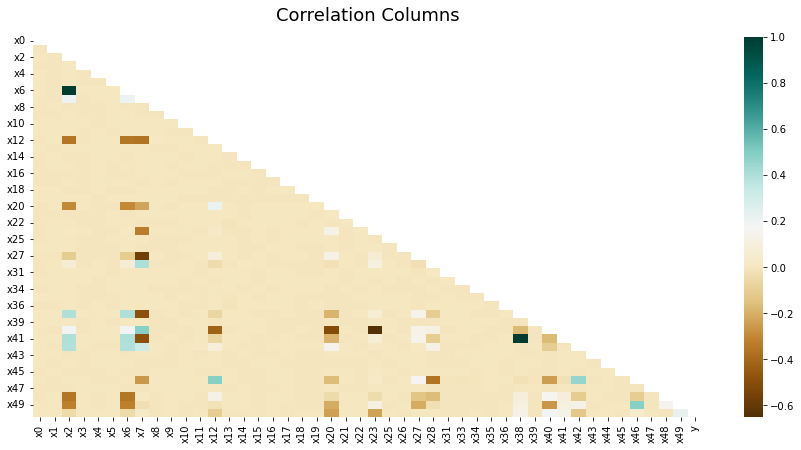

In [14]:
corr_map(blind_data, 15, 7)

In [15]:
to_drop = auto_corr(blind_data, 0.9)


There are a total of 2 variables to drop due to a correlation over 0.9

These are the variables that are correlated over 0.9: ['x6', 'x41']


In [16]:
# drop 2 variables from the blind_data dataframe
blind_data.drop(columns = to_drop, inplace = True)


In [17]:
blind_data.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x42',
       'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'y'],
      dtype='object')

---
### Split data and target



In [18]:
DATA = copy.deepcopy(blind_data.iloc[:,:-1])

TARGET = copy.deepcopy(blind_data.y)
DATA.shape, TARGET.shape

((160000, 48), (160000,))

---

### Impute Missing Data
*   convert x37 from object to float64
*   float values: use interpolate both ways for numberical values
*   categorical values: use most widely used categorical values for the missing categorical features


In [19]:
# convert dollars to floats
DATA.x37 = DATA.x37.str[1:]
DATA.x37 = DATA.x37.astype('float64')

In [20]:
# numerical features
#make copy of the float columns
float_data = copy.deepcopy(DATA.select_dtypes(include='float'))

# copy columns names
FLOAT_COLS = float_data.columns

# impute values
float_data = float_data.interpolate(method = 'linear', axis = 1, limit_direction='both')

# reassign the new columns back to the original data
DATA[FLOAT_COLS] = float_data

In [21]:
# function to find most occuring value for imputing 

def most_occuring(series):
  val_counts = series.value_counts()
  most = val_counts.index[0]
  return most


In [22]:
# fix the rows in col x32 that have a value of '-0.0%' -> '0.0%'
x32 = copy.deepcopy(DATA.x32)
rows_to_replace = np.where(x32 == '-0.0%')
x32.iloc[rows_to_replace] = '0.0%'
DATA.x32 = x32
DATA.x32.unique()


array(['0.0%', '-0.02%', '-0.01%', '0.01%', '-0.03%', '0.02%', '-0.04%',
       nan, '0.03%', '0.04%', '-0.05%', '0.05%'], dtype=object)

In [23]:
#categorical features
cat_data = copy.deepcopy(DATA.select_dtypes(include='object'))
cat_data
CAT_COLS = cat_data.columns
vals = most_occuring(cat_data)
i = 0
for c in CAT_COLS:
  cat_data[c] = cat_data[c].fillna(vals[i])

DATA[CAT_COLS] = cat_data

In [24]:
DATA[DATA.isna()].sum().sum()

0.0

## <font color='blue'>Modeling Preparations (10pts)</font>
The task is to build a model that generalizes on a binary target so the data team will start with a simple Logistic Regression model and then progress to more complex models including Random Forest, SVM with SCG, and lastly a neural network.

The Random Forest may give the best results due to the fact that it can handle large datasets and it is more suitable for binary result classification. It also can help prevent over-fitting and biased results that are often seen in Logistic Regression by aggregating many random trees. SVM model gives points in each class closest to the boundary between classes but can struggle to predict the binary result that we want for this case.

Our focus throughout will be on the total cost of the false positives and negatives combined. To optimize this can be a little bit complicated, but the most important measure will be the lowest sum of the false positives multiplied by 100 and the false negatives multiplied by 25. The recall of the negative (0) class and the precision of the positive (1) class will also be important, but secondary. Accuracy would be nice but is not the primary goal. The accuracy should increase naturally as the total cost decreases and the other two measures increase. 

## <font color='blue'>Model Building and Evaluation (40pts)</font>
There is no specification on which models to utilize and the overall objective is to minimize the monetary loss for the client where a false positive prediction for a 1 costs \\$100 and a flase positive prediction for a 0 costs \\$25. The total number of correct or incorrect predictions does not matter to the client, only the total cost. 

An analysis of how the models perform in comparison to each other will be presented at the end of the section.

### Train Test Spilt

A 70/30 train/test split using cross validation will be the sampling methodology.

In [25]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# split the data
x_train, x_test, y_train, y_test = train_test_split(DATA, TARGET, test_size = 0.30, random_state = 42)

# avoid setting off error warnings
x_train = copy.deepcopy(x_train)
x_test = copy.deepcopy(x_test)

# categorical columns
cat_train = copy.deepcopy(x_train.loc[:, CAT_COLS]) 
cat_test = copy.deepcopy(x_test.loc[:, CAT_COLS])

# foat columns
float_train = copy.deepcopy(x_train.loc[:, FLOAT_COLS])
float_test = copy.deepcopy(x_test.loc[:, FLOAT_COLS])


# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(cat_train)
cat_train = ordinal_encoder.transform(cat_train)
cat_test = ordinal_encoder.transform(cat_test)


# standardscaler input variables
standardscaler = StandardScaler()
standardscaler.fit(float_train)
float_train = standardscaler.transform(float_train)
float_test = standardscaler.transform(float_test)

x_train[CAT_COLS] = cat_train
x_test[CAT_COLS] = cat_test
x_train[FLOAT_COLS] = float_train
x_test[FLOAT_COLS] = float_test

# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)


In [26]:
bool(x_train._is_copy)

False

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112000, 48), (48000, 48), (112000,), (48000,))

In [28]:
#x_train.info()

### Function for Reporting Metrics

In [29]:
# predict probabilites of classifying (0,1) and use a threshold to increase recall
from sklearn.metrics import confusion_matrix, classification_report

def cost(M):
    FP_ones_cost = M[0,1] * 100
    FP_zeros_cost = M[1,0] * 25
    tot_cost = FP_ones_cost + FP_zeros_cost
    return(FP_ones_cost, FP_zeros_cost, tot_cost)
    
def print_cost(M):
    one, zero, total = cost(M)
    print('Cost of False Positives: ${:,.2f}'.format(one))
    print('Cost of False Negatives: ${:,.2f}'.format(zero))
    print('Total Cost of Prediction Errors: ${:,.2f}'.format(total))
    return one, zero, total
    

def tune_classifier(est, X_test, threshold):
    threshold = threshold
    try:
        scores = est.predict_proba(X_test)
        predicted = (scores[:,1] >= threshold).astype('int')
        estimator = est.best_estimator_
    except:
        predicted = est.predict(X_test)
        predicted = predicted.astype('int')
        estimator = est
        
    M = confusion_matrix(y_test.astype('int'), predicted, labels=[0,1])
    one, zero, total = cost(M)
    class_report = classification_report(y_test.astype('int'), predicted) 

    params = {'estimator': estimator,
              'predicted': predicted,
              'confusion_matrix': M,
              'classification_report': class_report,
              'fp_ones_cost': one,
              'fp_zeros_cost': zero,
              'total_cost': total}
    return params

def print_params(params):
    # print out results accuracy, prec, recall, f1 scores
    print(params['estimator'])
    print()
    print("Confusion Matrix:")
    print(pd.DataFrame(params['confusion_matrix'],
                       columns=['0', '1'],
                       index=['0', '1']))
    print('- - - - - - - - - - - -\n ')
    print('\nClassification Report:')
    print(params['classification_report'])
    print('\n- - - - - - - - - - - - ')
    print_cost(params['confusion_matrix'])

---
### <font color='blue'>Logistic Regression</font>

In [30]:
'''
%%time 
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

log_clf = LogisticRegression(random_state=42)
log_params = {'penalty':['l1','l2','elasticnet'],
              'C':[1,10,100],
              'class_weight': ['None','balanced'],
              'solver':['lbfgs', 'liblinear']}

gs_logreg = GridSearchCV(estimator = log_clf,
                         n_jobs = -1,
                         param_grid = log_params,
                         cv = 5,
                         scoring = 'accuracy',
                         refit = 'accuracy', verbose=10)

gs_logreg.fit(x_train, y_train)

'''

"\n%%time \n# logistic regression\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score\n\nlog_clf = LogisticRegression(random_state=42)\nlog_params = {'penalty':['l1','l2','elasticnet'],\n              'C':[1,10,100],\n              'class_weight': ['None','balanced'],\n              'solver':['lbfgs', 'liblinear']}\n\ngs_logreg = GridSearchCV(estimator = log_clf,\n                         n_jobs = -1,\n                         param_grid = log_params,\n                         cv = 5,\n                         scoring = 'accuracy',\n                         refit = 'accuracy', verbose=10)\n\ngs_logreg.fit(x_train, y_train)\n\n"

In [31]:
import pickle
logistic_pickle = 'gs_logreg.pickle'
'''
#write the logreg classifier pickle
outfile = open(logistic_pickle, 'wb')
pickle.dump(gs_logreg, outfile)
outfile.close()

'''
# read the logreg classifier pickle
infile = open(logistic_pickle, 'rb')
gs_logreg = pickle.load(infile)
infile.close()


In [32]:
gs_logreg.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [33]:
gs_logreg.best_score_

0.7081160714285714

### Basic Logistic Regression Model Metrics

In [34]:
#Threshold set to standard .5
logistic_pred = tune_classifier(gs_logreg, x_test, 0.5)

In [35]:
print_params(logistic_pred)

LogisticRegression(C=1, class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

Confusion Matrix:
       0      1
0  21048   7779
1   6166  13007
- - - - - - - - - - - -
 

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75     28827
           1       0.63      0.68      0.65     19173

    accuracy                           0.71     48000
   macro avg       0.70      0.70      0.70     48000
weighted avg       0.71      0.71      0.71     48000


- - - - - - - - - - - - 
Cost of False Positives: $777,900.00
Cost of False Negatives: $154,150.00
Total Cost of Prediction Errors: $932,050.00


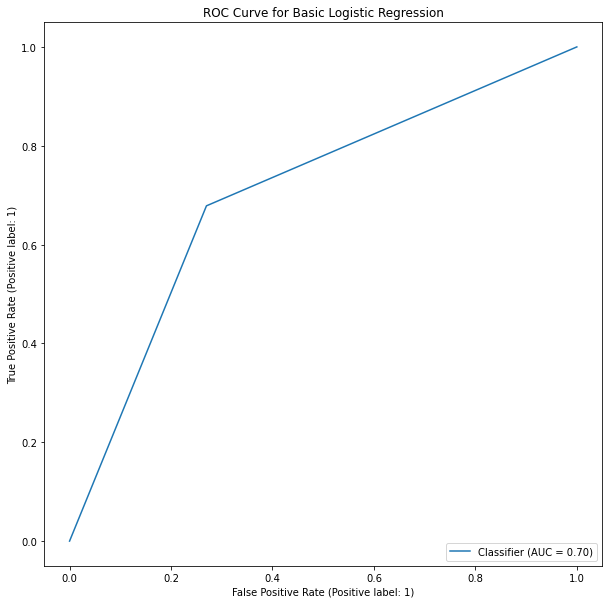

In [36]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(1,1,figsize=(10,10))

RocCurveDisplay.from_predictions(y_true = y_test, y_pred = logistic_pred['predicted'], ax=ax)
ax.set_title('ROC Curve for Basic Logistic Regression')
                                 
plt.show() 

### Cost Optimized Logistic Regression Model Metrics

In [37]:
#Threshold optimized for cost reduction at .9
logistic_pred = tune_classifier(gs_logreg, x_test, 0.9)

In [38]:
print_params(logistic_pred)

LogisticRegression(C=1, class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

Confusion Matrix:
       0     1
0  28641   186
1  18065  1108
- - - - - - - - - - - -
 

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.99      0.76     28827
           1       0.86      0.06      0.11     19173

    accuracy                           0.62     48000
   macro avg       0.73      0.53      0.43     48000
weighted avg       0.71      0.62      0.50     48000


- - - - - - - - - - - - 
Cost of False Positives: $18,600.00
Cost of False Negatives: $451,625.00
Total Cost of Prediction Errors: $470,225.00


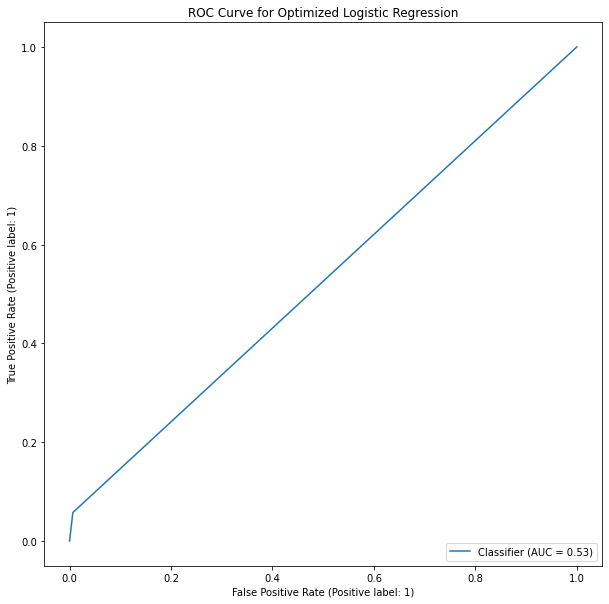

In [39]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
RocCurveDisplay.from_predictions(y_true = y_test, y_pred = logistic_pred['predicted'], ax=ax)
ax.set_title('ROC Curve for Optimized Logistic Regression')
                                 
plt.show() 

---
### <font color='blue'>RandomForestClassifier</font>

In [40]:
'''
%%time
# RandomForest Classifier
# logistic regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score


rf_clf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators':[10,50,100,300],
                  'criterion':['gini','entropy'], 
                  'max_depth':[5,10,20],
                  'min_samples_split':[2,4,9]}

gs_randomforest = GridSearchCV(estimator = rf_clf,
                         n_jobs = -1,
                         param_grid = rf_params,
                         cv = 5,
                         scoring = 'accuracy',
                         refit = 'accuracy',
                         verbose=10)

gs_randomforest.fit(x_train, y_train)
'''


"\n%%time\n# RandomForest Classifier\n# logistic regression\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score\n\n\nrf_clf = RandomForestClassifier(random_state=42)\nrf_params = {'n_estimators':[10,50,100,300],\n                  'criterion':['gini','entropy'], \n                  'max_depth':[5,10,20],\n                  'min_samples_split':[2,4,9]}\n\ngs_randomforest = GridSearchCV(estimator = rf_clf,\n                         n_jobs = -1,\n                         param_grid = rf_params,\n                         cv = 5,\n                         scoring = 'accuracy',\n                         refit = 'accuracy',\n                         verbose=10)\n\ngs_randomforest.fit(x_train, y_train)\n"

In [41]:
import pickle
rf_pickle = 'randomforest.pickle'
'''
#write the random forest classifier pickle
outfile = open(rf_pickle, 'wb')
pickle.dump(gs_randomforest, outfile)
outfile.close()

'''
# read the random forest classifier pickle
infile = open(rf_pickle, 'rb')
gs_randomforest = pickle.load(infile)
infile.close()


In [42]:
gs_randomforest.best_params_, gs_randomforest.best_score_

({'criterion': 'entropy',
  'max_depth': 20,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.9190357142857142)

### Basic Random Forest Model Metrics

In [43]:
#Threshold set to standard .5
randomforest_pred = tune_classifier(gs_randomforest, x_test, 0.5)

In [44]:
print_params(randomforest_pred)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=300,
                       random_state=42)

Confusion Matrix:
       0      1
0  27588   1239
1   2482  16691
- - - - - - - - - - - -
 

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     28827
           1       0.93      0.87      0.90     19173

    accuracy                           0.92     48000
   macro avg       0.92      0.91      0.92     48000
weighted avg       0.92      0.92      0.92     48000


- - - - - - - - - - - - 
Cost of False Positives: $123,900.00
Cost of False Negatives: $62,050.00
Total Cost of Prediction Errors: $185,950.00


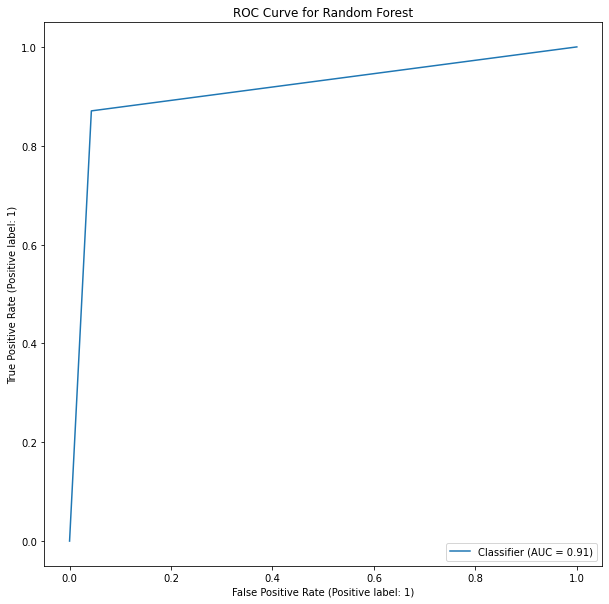

In [45]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
RocCurveDisplay.from_predictions(y_true = y_test, y_pred = randomforest_pred['predicted'], ax=ax)
ax.set_title('ROC Curve for Random Forest')
                                 
plt.show() 

### Cost Optimized Random Forest Model Metrics

In [46]:
#Threshold optimized for cost reduction at .6
randomforest_pred = tune_classifier(gs_randomforest, x_test, 0.6)

In [47]:
print_params(randomforest_pred)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=300,
                       random_state=42)

Confusion Matrix:
       0      1
0  28262    565
1   4253  14920
- - - - - - - - - - - -
 

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     28827
           1       0.96      0.78      0.86     19173

    accuracy                           0.90     48000
   macro avg       0.92      0.88      0.89     48000
weighted avg       0.91      0.90      0.90     48000


- - - - - - - - - - - - 
Cost of False Positives: $56,500.00
Cost of False Negatives: $106,325.00
Total Cost of Prediction Errors: $162,825.00


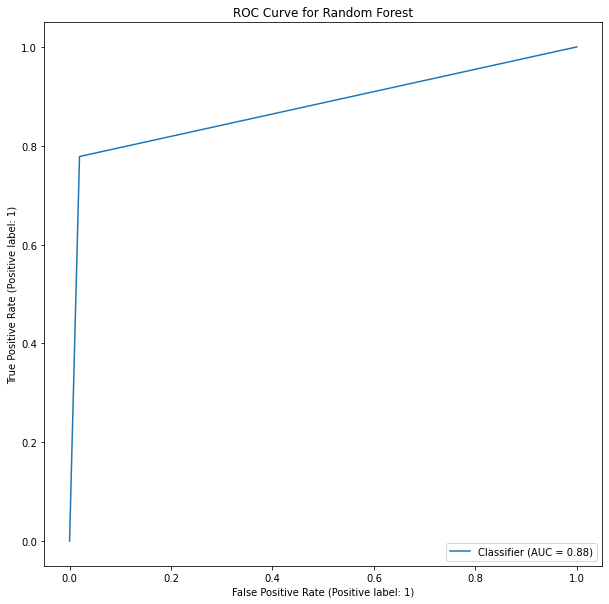

In [48]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
RocCurveDisplay.from_predictions(y_true = y_test, y_pred = randomforest_pred['predicted'], ax=ax)
ax.set_title('ROC Curve for Random Forest')
                                 
plt.show() 

---
### <font color='blue'>SVM Model with SGD</font>

### Basic SVM with SGD Model Metrics

In [49]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

regularize_const = 0.1
iterations = 5


start = time.time()
svm_sgd = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=0.005,
        fit_intercept=True, l1_ratio=1, random_state = 42, warm_start = True)
svm_sgd.fit(x_train,y_train)
stop = time.time()

In [50]:
sgd_pred = tune_classifier(svm_sgd, x_test, 0.5)

In [51]:
print_params(sgd_pred)

SGDClassifier(alpha=0.005, l1_ratio=1, penalty='elasticnet', random_state=42,
              warm_start=True)

Confusion Matrix:
       0     1
0  24081  4746
1   9386  9787
- - - - - - - - - - - -
 

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.77     28827
           1       0.67      0.51      0.58     19173

    accuracy                           0.71     48000
   macro avg       0.70      0.67      0.68     48000
weighted avg       0.70      0.71      0.70     48000


- - - - - - - - - - - - 
Cost of False Positives: $474,600.00
Cost of False Negatives: $234,650.00
Total Cost of Prediction Errors: $709,250.00


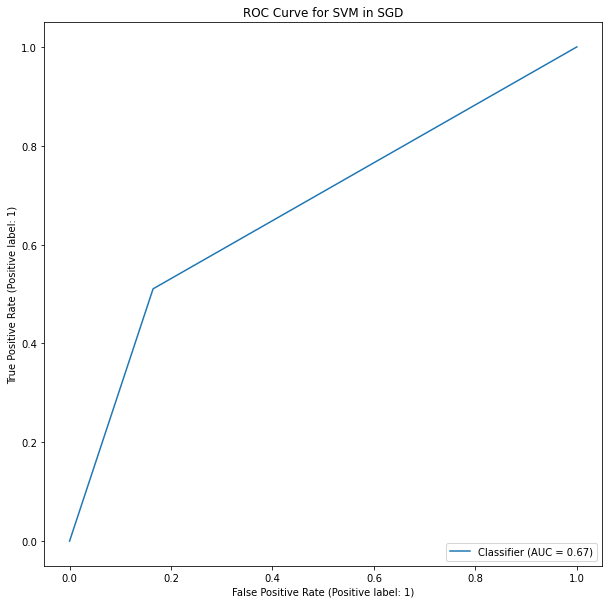

In [52]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
RocCurveDisplay.from_predictions(y_true = y_test, y_pred = sgd_pred['predicted'], ax=ax)
ax.set_title('ROC Curve for SVM in SGD')
                                 
plt.show() 

###  Cost Optimized SVM with SGD Model Metrics

In [53]:
start = time.time()
svm_sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=0.5,
        fit_intercept=True, l1_ratio=0.0, random_state = 42)
svm_sgd.fit(x_train,y_train)
stop = time.time()

In [54]:
sgd_pred = tune_classifier(svm_sgd, x_test, 0.5)

In [55]:
print_params(sgd_pred)

SGDClassifier(alpha=0.5, l1_ratio=0.0, random_state=42)

Confusion Matrix:
       0     1
0  28102   725
1  15759  3414
- - - - - - - - - - - -
 

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.97      0.77     28827
           1       0.82      0.18      0.29     19173

    accuracy                           0.66     48000
   macro avg       0.73      0.58      0.53     48000
weighted avg       0.71      0.66      0.58     48000


- - - - - - - - - - - - 
Cost of False Positives: $72,500.00
Cost of False Negatives: $393,975.00
Total Cost of Prediction Errors: $466,475.00


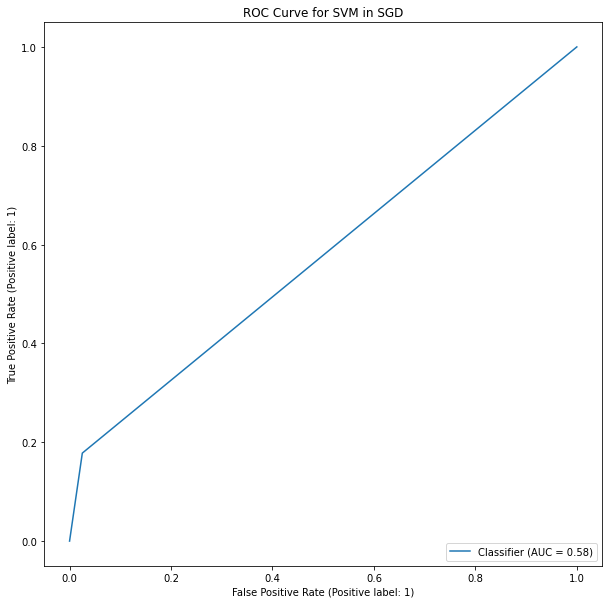

In [56]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
RocCurveDisplay.from_predictions(y_true = y_test, y_pred = sgd_pred['predicted'], ax=ax)
ax.set_title('ROC Curve for SVM in SGD')
                                 
plt.show() 

---
### <font color='blue'>Neural Network</font>

In [57]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
# build the neural network
# https://www.tensorflow.org/api_docs/python/tf/keras/Model

def nn_model(x_train,y_train):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Input(shape=(48,))) #input layer
    model.add(tf.keras.layers.Dense(256, activation = 'relu')) # hidden layer, 28 neurons
    model.add(tf.keras.layers.Dense(32, activation = 'relu'))
    model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

    model.compile(loss = 'BinaryCrossentropy', optimizer = 'adam', metrics=[tf.keras.metrics.BinaryAccuracy()])

    early_stopping = EarlyStopping(monitor = 'val_loss',
                                   min_delta = 0.001,
                                   patience = 2)

    history = model.fit(x_train, y_train,
                        validation_split = 0.2,
                        epochs = 100,
                        batch_size = 10000,
                        verbose = 1, # 0 = silent, 1 = status bar, 2 = line by line
                        callbacks = early_stopping)
    return model, history

In [59]:
# build the neural network
# use BinaryAccuracy as the metric from the tensorflow library functions: 
# https://www.tensorflow.org/api_docs/python/tf/keras/metrics/BinaryAccuracy

model, history = nn_model(x_train, y_train)
cnn_pred = tune_classifier(model, x_test, 0.5)

2021-12-01 00:24:08.728435: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
9/9 [==============================] - 1s 39ms/step - loss: 0.8282 - binary_accuracy: 0.5063 - val_loss: 0.6887 - val_binary_accuracy: 0.6062
Epoch 2/100
9/9 [==============================] - 0s 23ms/step - loss: 0.6712 - binary_accuracy: 0.6104 - val_loss: 0.6329 - val_binary_accuracy: 0.6386
Epoch 3/100
9/9 [==============================] - 0s 27ms/step - loss: 0.6194 - binary_accuracy: 0.6735 - val_loss: 0.6121 - val_binary_accuracy: 0.6980
Epoch 4/100
9/9 [==============================] - 0s 25ms/step - loss: 0.5969 - binary_accuracy: 0.7061 - val_loss: 0.5818 - val_binary_accuracy: 0.7000
Epoch 5/100
9/9 [==============================] - 0s 27ms/step - loss: 0.5699 - binary_accuracy: 0.7064 - val_loss: 0.5604 - val_binary_accuracy: 0.7089
Epoch 6/100
9/9 [==============================] - 0s 22ms/step - loss: 0.5465 - binary_accuracy: 0.7224 - val_loss: 0.5380 - val_binary_accuracy: 0.7282
Epoch 7/100
9/9 [==============================] - 0s 27ms/step - loss: 0.52

In [61]:
print_params(cnn_pred)


Confusion Matrix:
       0  1
0  28827  0
1  19170  3
- - - - - - - - - - - -
 

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75     28827
           1       1.00      0.00      0.00     19173

    accuracy                           0.60     48000
   macro avg       0.80      0.50      0.38     48000
weighted avg       0.76      0.60      0.45     48000


- - - - - - - - - - - - 
Cost of False Positives: $0.00
Cost of False Negatives: $479,250.00
Total Cost of Prediction Errors: $479,250.00


### ANALYSIS

Our Random Forest Model performed the best when only examining the cost metric. While we will discuss cost further in the next section, we will discuss the tuning and performance of the models themselves in this section. 

The Logistic Regression model that was used as a baseline initially had a mediocre performance. With a threshold of .5, the model had an accuracy of 71%, with a roughly even amount of false positives and negatives. This would result in a cost to the client of \\$932,050 for 48k records. We then adjusted the threshold of the model, which shifts the balance of false negatives and positives by making it more or less difficult for the model to predict a certain class. For example, in our optimized Logistic Regression model, we shifted the threshold to .9, meaning the model had to be extremely sure before predicting a 1. This resulted in the model predicting very few class 1s, which in turn meant the false positives, which cost $100 each, were greatly reduced. The accuracy of the model dropped quite a bit - down to 62 from 71. Additionally the other metrics became very skewed. This model is not ideal for many reasons. It ignores all statistically significant metrics in favor of the cost. It is likely that even with the poor accuracy, this model would not generalize well to further data. 

The Random Forest model with a threshold of .5 performed fairly well, with an accuracy of 92% and high recall and precision for all classes. The cost for that model would be \\$185,950. Meanwhile, when optimizing for cost, the threshold only had to be adjusted a slight amount to result in fewer false positives, which resulted in a cost of \\$162,825. While the accuracy dropped by 2% down to 90%, the recall of the negative (0) class rose by 2% and the precision of the positive (1) class rose by 3%. This is a great tradeoff for the model because the incorrect predictions are of much greater interest than the overall accuracy of the model. This also resulted in a redution of cost by about \\$23K and should still generalize well due to the high statistical metrics. 

For the SVM with SGD, the performance was very similar to the Logistic Regression model - although rather than the threshold, we changed the alpha which adjusts the strength of the regularization term. Since it performed similarly to the Logistic Regression function, and much worse than the Random Forest Model, we will not do a full analysis on it. Suffice to say, the optimal SVM with SGD model would result in a cost of \\$466,475, with a low accuracy of 66%.

## <font color='blue'>Monetary Outcome (20pts)</font>

In [63]:
from operator import itemgetter
keys = ['estimator','fp_ones_cost', 'fp_zeros_cost', 'total_cost']
log_cost = itemgetter(*keys)(logistic_pred)
rf_cost = itemgetter(*keys)(randomforest_pred)
sgd_cost = itemgetter(*keys)(sgd_pred)
cnn_cost = itemgetter(*keys)(cnn_pred)
COSTS = pd.DataFrame([log_cost, rf_cost, sgd_cost, cnn_cost], columns = keys)
COSTS['estimator'] = COSTS['estimator'].apply(lambda x: str(x)[:12])
# format as currency
for cols in keys[1:]:
    COSTS[cols] = COSTS[cols].apply(lambda x: f"${x:,.0f}")
print(COSTS)

      estimator fp_ones_cost fp_zeros_cost total_cost
0  LogisticRegr      $18,600      $451,625   $470,225
1  RandomForest      $56,500      $106,325   $162,825
2  SGDClassifie      $72,500      $393,975   $466,475
3  <keras.engin           $0      $479,250   $479,250


In our cost optimized models, Random Forest performed the best by far when looking at the main metric of interest - cost. Our best model resulted in a cost of about \\$163K while our most basic model (Logistic Regression) resulted in a cost of about $932. Considering the client did not use any model prior to this, it is likely that by using the best model would result in costs savings of over \\$750k. 

## <font color='blue'>Case Conclusions (10pts)</font>

The Random Forest model should result in huge cost savings for the client, as reviewed in the Monetary Outcome section. 

It is possible a more complex neural network may produce even better accuracy, but it would be more difficult to tune specifically for precision and recall (and to specifically reduce false positives, which are so costly). 